In [1]:
!where python 

C:\Users\anna_\anaconda3\envs\meu_ambiente\python.exe
C:\Users\anna_\AppData\Local\Microsoft\WindowsApps\python.exe


In [4]:
!pip install -r requirements.txt

In [5]:
import sys
import subprocess
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

Matplotlib is building the font cache; this may take a moment.


In [6]:
print("Versão do Python:", sys.version)

Versão do Python: 3.9.20 (main, Oct  3 2024, 07:38:01) [MSC v.1929 64 bit (AMD64)]


In [7]:
print("Ambiente Virtual", sys.prefix)

Ambiente Virtual C:\Users\anna_\anaconda3\envs\meu_ambiente


In [8]:
df = pd.read_csv("Country-data.csv")

In [9]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


# Avaliação Iniciais dos dados

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


## Validação dos Nulos

In [11]:
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [12]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


## Quantidade de países

In [13]:
df['country'].nunique()

167

## Validação de Outliers e Distribuição dos dados

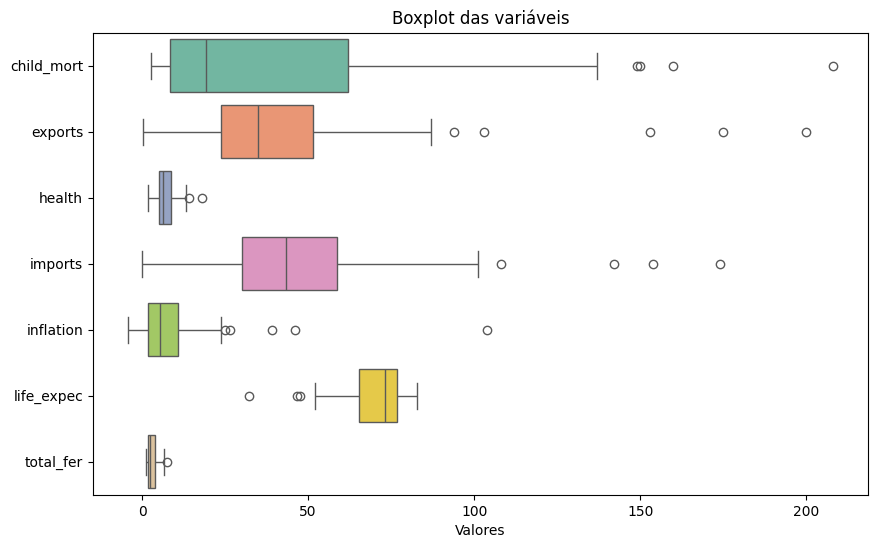

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['child_mort', 'exports', 'health', 'imports','inflation','life_expec','total_fer']], orient='h', palette='Set2')
plt.title('Boxplot das variáveis')
plt.xlabel('Valores')
plt.show()

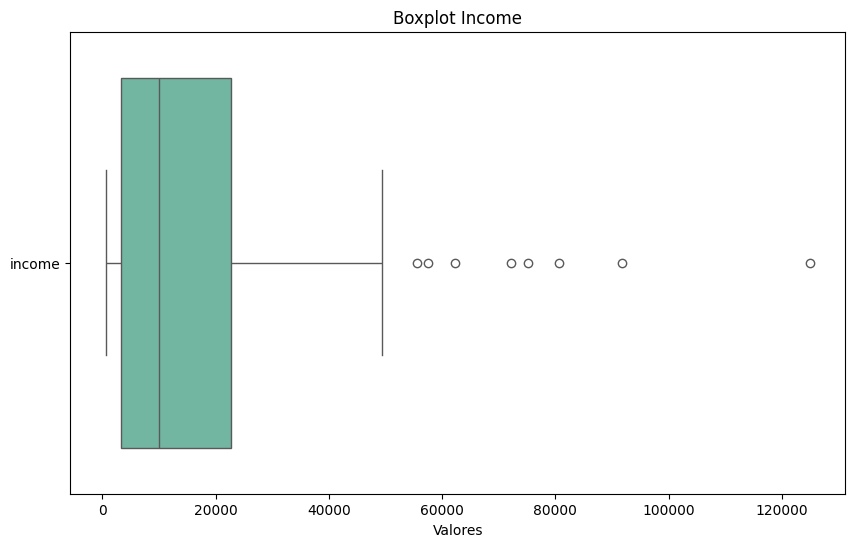

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['income']], orient='h', palette='Set2')
plt.title('Boxplot Income')
plt.xlabel('Valores')
plt.show()

In [18]:
df_2 = df.copy()
df_2.drop('country', axis=1, inplace=True)

## Mapa de Correlação

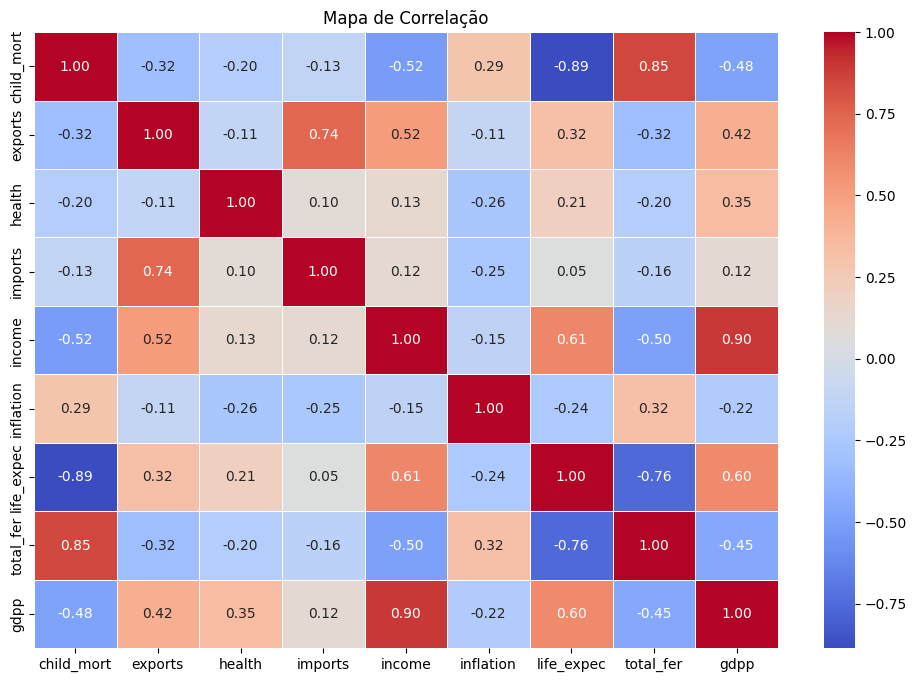

In [19]:
correlation_matrix = df_2.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de Correlação')
plt.show()

# Clusterização K-means

## Normalizando os dados

In [20]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_2)

In [21]:
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(scaled_features)

## Distribuição dos Custers

C:\Users\anna_\AppData\Local\Temp\ipykernel_27608\3514505978.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=df, palette='Set2')


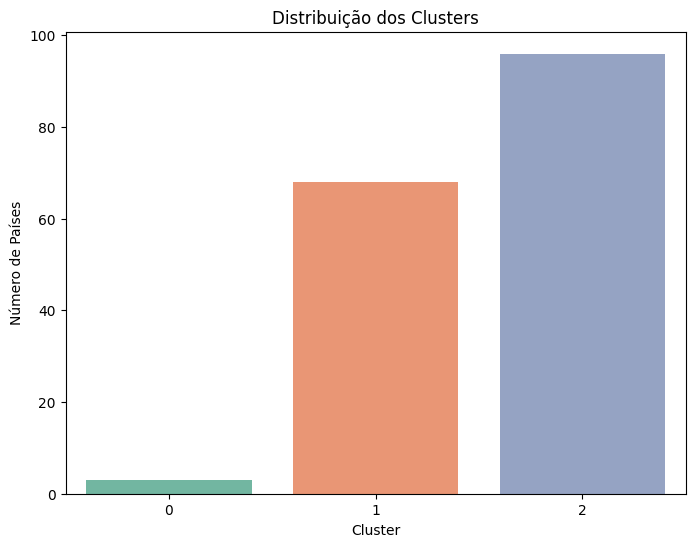

In [22]:
from sklearn.decomposition import PCA

df['Cluster'] = kmeans.labels_ 


plt.figure(figsize=(8, 6))
sns.countplot(x='Cluster', data=df, palette='Set2')
plt.title('Distribuição dos Clusters')
plt.xlabel('Cluster')
plt.ylabel('Número de Países')
plt.show()


## Clusters com centroides

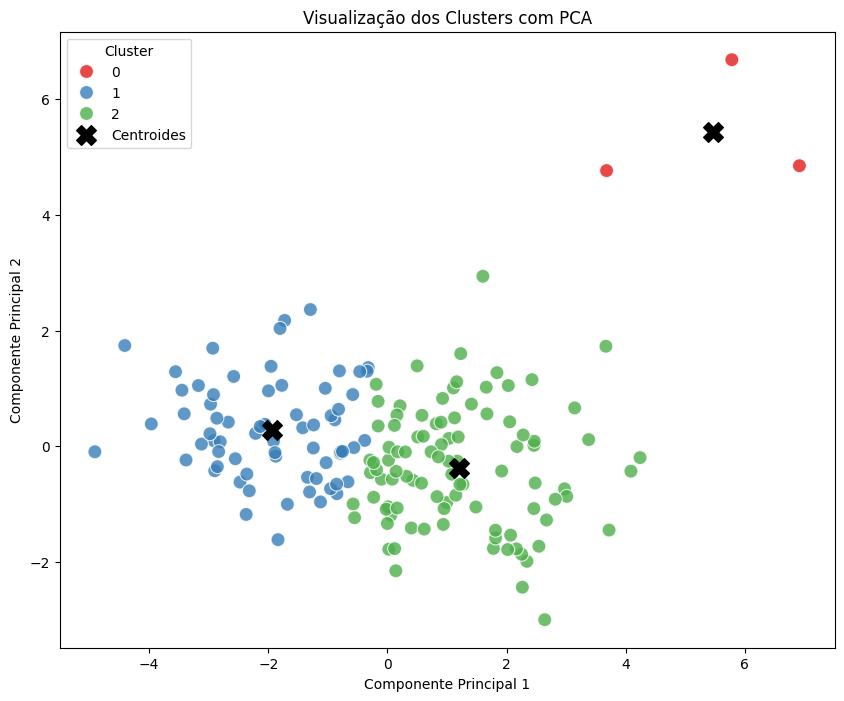

In [25]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

centroids = pca.transform(kmeans.cluster_centers_)

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='Set1', s=100, alpha=0.8)
plt.scatter(
    centroids[:, 0], centroids[:, 1],
    s=200, c='black', marker='X', label='Centroides'
)
plt.title('Visualização dos Clusters com PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.show()


In [42]:
from sklearn.metrics import pairwise_distances_argmin_min
centroids = kmeans.cluster_centers_
closest, _ = pairwise_distances_argmin_min(centroids, scaled_features)

countries_closest_to_centroids = df.iloc[closest]

# Exibir os países que representam os centróides
print("Países mais próximos dos centróides:")
print(countries_closest_to_centroids[['country', 'Cluster']])


Países mais próximos dos centróides:
          country  Cluster
132  Sierra Leone        1
85         Latvia        2
50        Eritrea        1


## Clusterização K-means Sem Outliers

In [27]:
sete_cinco = df['child_mort'].quantile(0.75)

dois_cinco = df['child_mort'].quantile(0.25)

IQR = sete_cinco - dois_cinco

upper = sete_cinco + (1.5 * IQR)

lower = dois_cinco - (1.5 * IQR)

In [28]:
def iqr_filter(df, cols):
    for col in cols:
        sete_cinco = df[col].quantile(0.75)
        dois_cinco = df[col].quantile(0.25)
        IQR = sete_cinco - dois_cinco
        upper = sete_cinco + (1.5 * IQR)
        lower = dois_cinco - (1.5 * IQR)
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df


In [29]:
colunas_outlier = ['child_mort', 'exports', 'health', 'imports','inflation','life_expec','total_fer','income']
df_sem_outlier = iqr_filter(df, colunas_outlier)

In [30]:
df_sem_outlier_2 = df_sem_outlier.drop('country', axis=1)

In [31]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_sem_outlier_2)

In [32]:
  kmeans = KMeans(n_clusters=3, random_state=0)
  labels = kmeans.fit_predict(scaled_features)

C:\Users\anna_\AppData\Local\Temp\ipykernel_27608\3896958339.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=df_sem_outlier, palette='Set2')


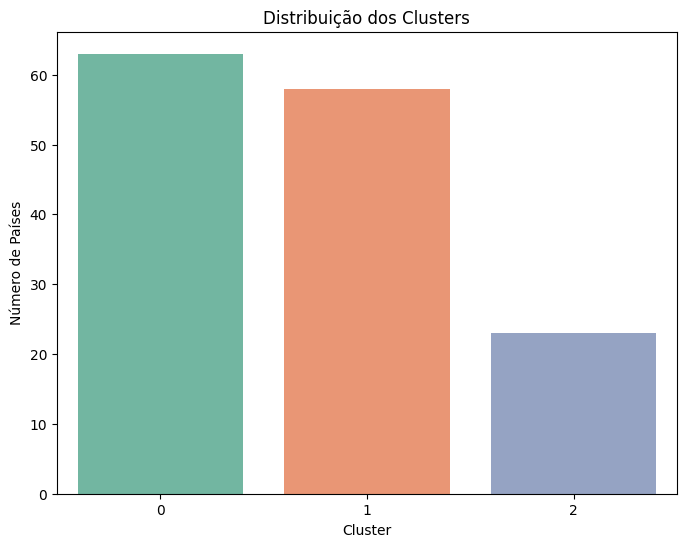

In [35]:
# Exemplo: Adicionando os clusters ao dataframe original
df_sem_outlier['Cluster'] = kmeans.labels_  # Substitua pelo objeto do seu modelo K-Means

# 1. Distribuição dos clusters
plt.figure(figsize=(8, 6))
sns.countplot(x='Cluster', data=df_sem_outlier, palette='Set2')
plt.title('Distribuição dos Clusters')
plt.xlabel('Cluster')
plt.ylabel('Número de Países')
plt.show()

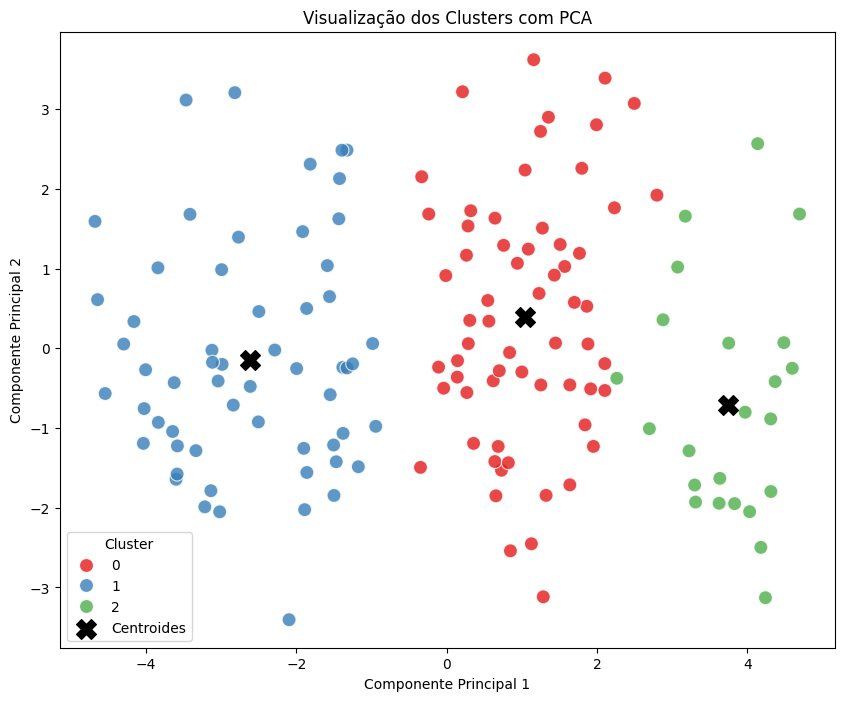

In [36]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)
df_sem_outlier['PCA1'] = pca_result[:, 0]
df_sem_outlier['PCA2'] = pca_result[:, 1]

centroids = pca.transform(kmeans.cluster_centers_)

# Scatter plot dos clusters no espaço 2D

plt.figure(figsize=(10, 8))
# Changed 'df' to 'df_sem_outlier' to access 'PCA1' and 'PCA2' columns
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_sem_outlier, palette='Set1', s=100, alpha=0.8)
plt.scatter(
    centroids[:, 0], centroids[:, 1],
    s=200, c='black', marker='X', label='Centroides'
)
plt.title('Visualização dos Clusters com PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.show()


Conseguimos ver claramente como os outliers afetam o kmeans, nos 3 clusters anteriores, aparentemente um cluster é formado apenas por outliers (clusters 0)

## Países mais próximos ao centroides

In [40]:
from sklearn.metrics import pairwise_distances_argmin_min
centroids = kmeans.cluster_centers_
closest, _ = pairwise_distances_argmin_min(centroids, scaled_features)

countries_closest_to_centroids = df_sem_outlier.iloc[closest]

# Exibir os países que representam os centróides
print("Países mais próximos dos centróides:")
print(countries_closest_to_centroids[['country', 'Cluster']])


Países mais próximos dos centróides:
        country  Cluster
152     Tunisia        0
93   Madagascar        1
53      Finland        2


# Clusterização Hierarquica

In [47]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import euclidean_distances

In [45]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_2)

In [48]:
n_clusters = 3
cluster = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
clusters = cluster.fit_predict(scaled_features)

In [51]:
df['Cluster'] = cluster.labels_

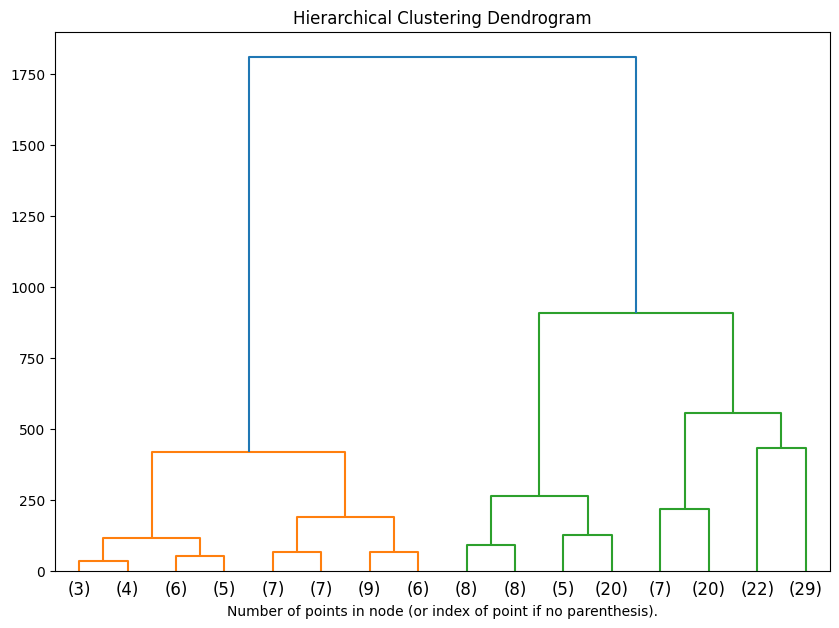

In [52]:
!pip install scikit-learn scipy matplotlib
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import euclidean_distances
import numpy as np
import matplotlib.pyplot as plt

def plot_dendrogram(model, **kwargs):

    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)

    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = linkage(model.children_, method=model.linkage)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# Assuming scaled_features is your pre-scaled data
# Example usage with distance computation enabled:
n_clusters = 3
cluster = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward', compute_distances=True) # enable distance computation
model = cluster.fit(scaled_features)  # Fit the model

plt.figure(figsize=(10, 7))
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [58]:
clusters

array([2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1,
       1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 2, 1, 0, 1, 0, 1, 1, 2, 2, 1,
       2, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 2, 2, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       0, 0, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 0, 2, 1, 1,
       2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 2, 1, 1, 2, 1, 1, 1,
       1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2])

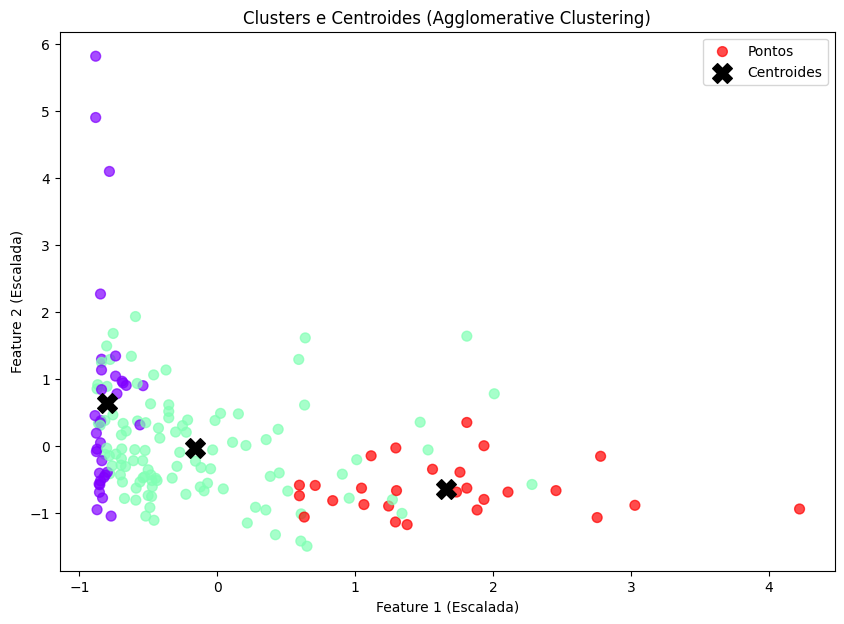

In [59]:

plt.figure(figsize=(10, 7))
plt.scatter(
    scaled_features[:, 0], scaled_features[:, 1], 
    c=clusters, cmap='rainbow', alpha=0.7, s=50, label='Pontos'
)

plt.scatter(
    centroids[:, 0], centroids[:, 1],
    s=200, c='black', marker='X', label='Centroides')

plt.title('Clusters e Centroides (Agglomerative Clustering)')
plt.xlabel('Feature 1 (Escalada)')
plt.ylabel('Feature 2 (Escalada)')
plt.legend()
plt.show()

# Kmedoids

In [63]:
!pip install sklearn_extra

ERROR: Could not find a version that satisfies the requirement sklearn_extra (from versions: none)
ERROR: No matching distribution found for sklearn_extra


In [62]:
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import pairwise_distances_argmin_min
import numpy as np

# Supondo que você já tenha os dados escalados: scaled_features

# Inicializar o K-Medoids
kmedoids = KMedoids(n_clusters=3, random_state=42, method='pam')  # Usa o método PAM

# Ajustar o modelo
kmedoids.fit(scaled_features)

# Obter os rótulos dos clusters
labels = kmedoids.labels_

# Para cada medoid, encontrar o ponto mais próximo ao baricentro (média)
baricentros = np.array([
    scaled_features[labels == cluster].mean(axis=0)
    for cluster in np.unique(labels)
])

dados_mais_proximos, _ = pairwise_distances_argmin_min(baricentros, scaled_features)

# Exibir os índices dos dados mais próximos ao baricentro em cada cluster
print("Índices dos dados mais próximos ao baricentro:", dados_mais_proximos)

# Para visualizar os medoids selecionados pelo algoritmo
print("Medoids escolhidos pelo K-Medoids:", kmedoids.medoid_indices_)


ModuleNotFoundError: No module named 'sklearn_extra'